INFO7390-Advances-In-Data-Sciences-And-Architecture

Assignment 2

Name : Sai Venkata Samanth Koduru

NUID : 002983840

# Problem Statement

Implement a single neuron neural network, aka, the logistic regression unit. Use Log Loss Function, write code to carry out stochastic gradient descent for optimization, and then write a different activation function i.e., replace the sigmoid compression by ReLu or tan. Ideally, implement as a set of functions*. Run it on any classification problem using a dataset from the internet (say the titanic dataset). Provide accuracy and F1 score of the results. Please write code in Python in a Jupyter notebook.








#Data Description
Dataset Link: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

This dataset contains 7 features and a label column.

longhair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".

foreheadwidthcm - This column is in CM's. This is the width of the forehead. 

foreheadheightcm - This is the height of the forehead and it's in Cm's.

nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose". 

noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

gender - This is either "Male" or "Female".

In [8]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import math
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict

In [9]:
url = 'gender_classification.csv'
df = pd.read_csv(url)

In [ ]:
! pip install pandas-profiling==2.7.1

#Exploring the Data

In [11]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df,minimal=True)
profile

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

As we can see there are no null values

In [13]:
#Encoding the labels to categorical values
df.gender = df.gender.astype('category').cat.codes

# Spliting the dataset into train and test. Then we convert the dataframes into arrays

In [14]:
#Creating a train-test split
size = int(0.8 * len(df))

train_set = df[:size]
test_set = df[size:]
#Separating labels and predictor variables
y_train = train_set[['gender']]
X_train = train_set.drop('gender', 1)

y_test = test_set[['gender']]
X_test = test_set.drop('gender', 1)
print(X_train.shape)
print(y_train.shape)

(4000, 7)
(4000, 1)


<ipython-input-14-958fda79230d>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = train_set.drop('gender', 1)
<ipython-input-14-958fda79230d>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test = test_set.drop('gender', 1)


In [15]:
#Converting dataframe into numpy array
y_train = np.array(y_train)
X_train = X_train.to_numpy()

y_test = np.array(y_test)
X_test = X_test.to_numpy()

In [16]:
#Defining the initial weights and bias
weight = np.zeros(X_train.shape[1])
bias = 0

# Building the logistic regression model with Sigmoid activation function

The sigmoid function is denoted as follows: 


<center>σ(x)  =  1 / (1 + e^(-x))</center>


The sigmoid function represents values ​​between (0 and 1) and is therefore particularly useful for models used to predict probabilities as outputs. So the sigmoid function gives good estimates in logistic regression as the result is a probability in the [0,1] range.

In [17]:
#Defining the sigmoid function 
def Sigmoid(x):
    return 1 / (1 + math.exp(-x))
# Defining the accuracy metrics 
def accuracy_metrics(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if (actual[i]>0.5) == (predicted[i]>0.5):
            correct += 1
    return correct / float(len(actual)) * 100.0
def fit_train():
    y_pred = []
    loss = 0
    for i in range(X_train.shape[0]):
        y_pred_temp = Sigmoid(np.dot(X_train[i],weight) + bias)        
        loss += np.multiply(np.log(y_pred_temp), y_train[i])+ np.multiply(np.log(1-y_pred_temp), 1-y_train[i]) 
        y_pred.append(y_pred_temp)
    loss = -loss/X_train.shape[1]
    
    return y_pred, loss
def fit_test():
    y_pred_test = []
    loss_test = 0
    for i in range(X_test.shape[0]):
        y_pred_temp = Sigmoid(np.dot(X_test[i],weight)+bias)        
        loss_test += -(np.multiply(np.log(y_pred_temp), y_test[i])+ np.multiply(np.log(1-y_pred_temp), 1-y_test[i]))
        y_pred_test.append(y_pred_temp)    
        
    return y_pred_test, loss_test
def update_bias(bias):
    grad_bias = 0
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) #dJ/db
        for j in range(len(weight)):
            grad_w[j] += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i])*(X_train[i][j])

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias
def update_weight(): 
    for j in range(len(weight)):
        weight[j] = weight[j] - grad_w[j]*learning_rate/X_train.shape[0]
    
    return weight

In [18]:
loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = Sigmoid(np.dot(X_train[i],weight) + bias) 
    y = y_train[i]
    loss += np.multiply(np.log(y_pred), y) + np.multiply(np.log(1-y_pred), 1-y)
loss = - loss/X_train.shape[1]
print(loss)

[396.08410318]


In [19]:
# Defining the training hyperparameters
max_epoch = 100
learning_rate = 0.01
Training_data = {"trainLoss":[],"testLoss":[],"trainAccuracy":[],"testAccuracy":[]}

In [20]:
for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%10==0:
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

Training loss:396.084103
Test loss:0.346574
Training accuracy: 49.875000
Validation accuracy: 50.549451
Training loss:393.944447
Test loss:0.344840
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:392.095567
Test loss:0.343244
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:390.277239
Test loss:0.341648
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:388.474409
Test loss:0.340059
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:386.686049
Test loss:0.338482
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:384.911997
Test loss:0.336916
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:383.152165
Test loss:0.335364
Training accuracy: 73.650000
Validation accuracy: 74.225774
Training loss:381.406482
Test loss:0.333824
Training accuracy: 79.200000
Validation accuracy: 80.419580
Training loss:379.674876
Test loss:0.332296
Training accuracy: 7

# Analyzing the accuracy and f1 score of the model

We can see that the logistic regression model which we have built performs very well with validation accuracy of 80.42% and F1 score of 0.9.

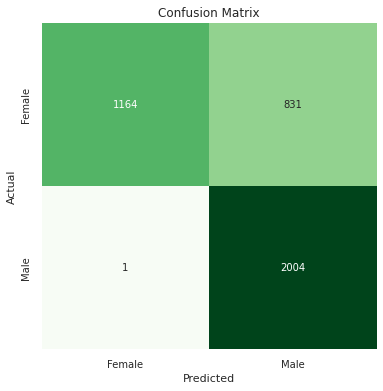

In [21]:
# Compute the confusion matrix

y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.yticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
for epoch in range(max_epoch):
  if epoch%100 == 0:  
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))

Training accuracy: 79.200000
Validation accuracy: 80.419580


In [23]:
tp = cm [0][0]
fp = cm [1][0]
tn = cm [1][1]
fn = cm [0][1]

precision = tp / (tp + fp)
recall = tp / (tp + fp)

f1 = 2 * (precision * recall) / (precision + recall)

print("F1 score: {}".format(f1,2))

F1 score: 0.9991416309012876


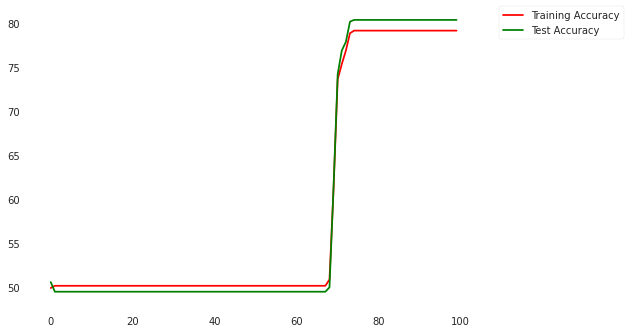

In [24]:
plt.plot(Training_data['trainAccuracy'],label='Training Accuracy',color='red')
plt.plot(Training_data['testAccuracy'],label='Test Accuracy',color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

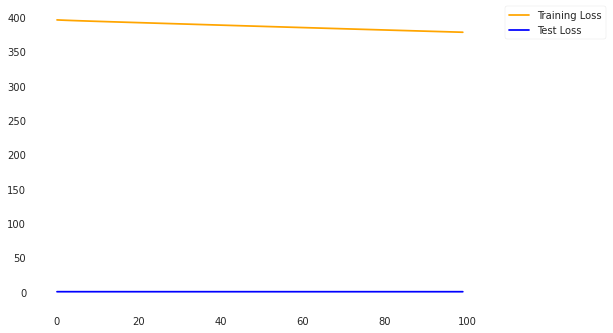

In [25]:
plt.plot(Training_data['trainLoss'],label='Training Loss',color='orange')
plt.plot(Training_data['testLoss'],label='Test Loss',color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Replacing the Sigmoid activation function with ReLu

Rectified Linear Units or ReLu is one of the most widely used activation functions as it solves the vanishing gradient problem which plagues the sigmoid function. It returns 0 if it receives any negative input, but for any positive value x, it returns that value back.

ReLu function is denoted as follows:

<center>f(x) = max(0,x)</center>

In [26]:
def ReLu(x):
    return max(0.0, x)
def fit_train_relu():
    y_pred = []
    loss = 0
    for i in range(X_train.shape[0]):
        y_pred_temp = ReLu(np.dot(X_train[i],weight) + bias)        
        loss += (y_train[i] - y_pred_temp)*(y_train[i] - y_pred_temp) 
        y_pred.append(y_pred_temp)
    loss = loss/(2 * X_train.shape[0])
    
    return y_pred, loss
def fit_test_relu():
    y_pred_test = []
    loss_test = 0
    for i in range(X_test.shape[0]):
        y_pred_temp = ReLu(np.dot(X_test[i],weight)+bias)        
        loss_test += (y_test[i] - y_pred_temp)*(y_test[i] - y_pred_temp) 
        y_pred_test.append(y_pred_temp) 
    return y_pred_test, loss_test

In [27]:
loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = ReLu(np.dot(X_train[i],weight) + bias)
    y = y_train[i]
    loss += (y - y_pred)*(y - y_pred)
loss = loss/2

In [28]:
#Training the neural network with relu activation function
max_epoch = 50

for epoch in range(max_epoch):

  y_pred, loss = fit_train_relu()
  y_pred_test, loss_test = fit_test_relu()
        
  loss_test = loss_test/(2*X_test.shape[0])
  trainAcc = accuracy_metrics(y_train,y_pred)
  testAcc = accuracy_metrics(y_test,y_pred_test)
    
  Training_data["trainLoss"].append(loss)
  Training_data["testLoss"].append(loss_test)
  Training_data["trainAccuracy"].append(trainAcc)
  Training_data["testAccuracy"].append(testAcc)
    
    
  if epoch%10==0:
    print("Training loss:%f" %(loss))
    print("est loss:%f" %(loss_test))
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))
        
  y_pred = np.array(y_pred)  
  grad_w, bias = update_bias(bias)
  weight = update_weight()

Training loss:0.191798
est loss:0.189743
Training accuracy: 49.875000
Validation accuracy: 50.549451


<ipython-input-28-312096cb7305>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(y_pred)


Training loss:0.087560
est loss:0.087069
Training accuracy: 96.425000
Validation accuracy: 97.302697
Training loss:0.085557
est loss:0.085057
Training accuracy: 96.450000
Validation accuracy: 97.302697
Training loss:0.083624
est loss:0.083114
Training accuracy: 96.425000
Validation accuracy: 97.302697
Training loss:0.081758
est loss:0.081238
Training accuracy: 96.350000
Validation accuracy: 97.202797


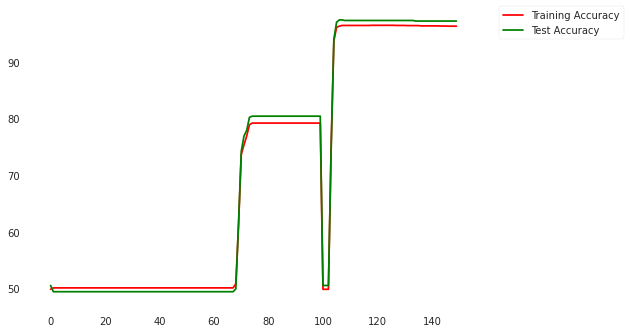

In [29]:
plt.plot(Training_data['trainAccuracy'],label='Training Accuracy',color='red')
plt.plot(Training_data['testAccuracy'],label='Test Accuracy',color='green')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

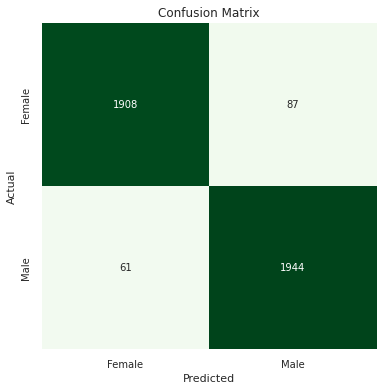

In [30]:
y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.yticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [31]:
for epoch in range(max_epoch):
  if epoch%50 == 0:  
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))

Training accuracy: 96.300000
Validation accuracy: 97.202797


In [32]:
tp = cm [0][0]
fp = cm [1][0]
tn = cm [1][1]
fn = cm [0][1]

precision = tp / (tp + fp)
recall = tp / (tp + fn)

f1 = 2 * (precision * recall) / (precision + recall)

print("F1 score: {}".format(round(f1,2)))

F1 score: 0.96


# Adding L1 (Lasso) and L2 (Ridge) Regression to the model

I have tested the model with varying ranges of learning rate, epochs as well as l1 and l2 penalties and we can see that there is significant drop in model performance upon applying the ridge and lasso regression to the model. 

In [33]:
weight = np.zeros(X_train.shape[1])
bias = 0

In [34]:
def update_bias(bias):
    grad_bias = 0
    l1_penality = 0.05
    a,b = X_train.shape
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) 
        for j in range(len(weight)):
            if grad_w[j] > 0:
              grad_w[j] += (-(2*(X_train[i][j])*(y_train[i] - y_pred[i])) + l1_penality)/a
            else:
              grad_w[j] += (-(2*(X_train[i][j])*(y_train[i] - y_pred[i]) ) - l1_penality )/a

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias
def update_bias(bias):
    grad_bias = 0
    l2_penality = 0.001
    a,b = X_train.shape
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) 
        for j in range(len(weight)):
            grad_w[j] += -(2*(X_train[i][j])*(y_train[i] - y_pred[i]) + (2*l2_penality*weight[j]))/a 

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias

In [35]:
max_epoch = 100
learning_rate = 0.001
for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%100 == 0:
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

Training loss:396.084103
Test loss:0.346574
Training accuracy: 49.875000
Validation accuracy: 50.549451


In [36]:
weight = np.zeros(X_train.shape[1])
bias = 0

In [37]:
max_epoch = 100

for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%100 == 0:
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

Training loss:396.084103
Test loss:0.346574
Training accuracy: 49.875000
Validation accuracy: 50.549451


# Conclusion

In this notebook, we built a neural network with a single neuron. We used the Sigmoid and ReLu activation functions to investigate their impact on Kaggle's gender classification dataset. We also implemented regularization using the L1 method (Lasso) and the L2 method (Ridge).